# Superhero (and Supervillain) Name Generator

---

[Superhero Names Dataset](https://github.com/am1tyadav/superhero)

## Task 1

1. Import the data
2. Create a tokenizer
3. Char to index and Index to char dictionaries

In [ ]:
with open("/content/superhero/superheroes.txt", "r") as f:
  data= f.read()

data[:100]

'jumpa\t\ndoctor fate\t\nstarlight\t\nisildur\t\nlasher\t\nvarvara\t\nthe target\t\naxel\t\nbattra\t\nchangeling\t\npyrrh'

In [ ]:
import tensorflow as tf

In [ ]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(
    filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~',
    split='\n',
)

In [ ]:
tokenizer.fit_on_texts(data)

In [ ]:
char_to_index = tokenizer.word_index
index_to_char = dict((v,k) for k, v in char_to_index.items())

print(index_to_char)

{1: '\t', 2: 'a', 3: 'e', 4: 'r', 5: 'o', 6: 'n', 7: 'i', 8: ' ', 9: 't', 10: 's', 11: 'l', 12: 'm', 13: 'h', 14: 'd', 15: 'c', 16: 'u', 17: 'g', 18: 'k', 19: 'b', 20: 'p', 21: 'y', 22: 'w', 23: 'f', 24: 'v', 25: 'j', 26: 'z', 27: 'x', 28: 'q'}


## Task 2

1. Converting between names and sequences

In [ ]:
names = data.splitlines()
names[:10]

['jumpa\t',
 'doctor fate\t',
 'starlight\t',
 'isildur\t',
 'lasher\t',
 'varvara\t',
 'the target\t',
 'axel\t',
 'battra\t',
 'changeling\t']

In [ ]:
tokenizer.texts_to_sequences(names[0])

[[25], [16], [12], [20], [2], [1]]

In [ ]:
def name_to_seq(name):

  return[tokenizer.texts_to_sequences(c)[0][0] for c in name]

In [ ]:
name_to_seq(names[0])

[25, 16, 12, 20, 2, 1]

In [ ]:
def seq_to_name(seq):
  return ''.join([index_to_char[i] for i in seq if i !=0])

In [ ]:
seq_to_name(name_to_seq(names[0]))

'jumpa\t'

## Task 3

1. Creating sequences
2. Padding all sequences

In [ ]:
sequences= []

for name in names:
  seq= name_to_seq(name)
  if len(seq) >=2:
    sequences += [seq[:i] for i in range(2,len(seq) + 1)]

In [ ]:
sequences[:10]

[[25, 16],
 [25, 16, 12],
 [25, 16, 12, 20],
 [25, 16, 12, 20, 2],
 [25, 16, 12, 20, 2, 1],
 [14, 5],
 [14, 5, 15],
 [14, 5, 15, 9],
 [14, 5, 15, 9, 5],
 [14, 5, 15, 9, 5, 4]]

In [ ]:
max_len = max([len(x) for x in sequences])
print(max_len)

33


In [ ]:
padded_sequences = tf.keras.preprocessing.sequence.pad_sequences(
    sequences, padding= 'pre', maxlen=max_len
)
print(padded_sequences[0])

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0 25 16]


In [ ]:
padded_sequences.shape

(88279, 33)

## Task 4: Creating Training and Validation Sets

1. Creating training and validation sets

In [ ]:
x, y = padded_sequences[:,:-1], padded_sequences[:,-1]
print(x.shape, y.shape)

(88279, 32) (88279,)


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(66209, 32) (66209,)
(22070, 32) (22070,)


In [ ]:
num_chars= len(char_to_index.keys()) +1
print(num_chars)

29

## Task 5: Creating the Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPool1D, LSTM, Bidirectional, Dense

model = Sequential([
                    Embedding(num_chars, 8, input_length= max_len-1),
                    Conv1D(64, 5, strides=1, activation='tanh', padding='causal'),
                    LSTM(32),
                    Dense(num_chars, activation='softmax')
])

model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer='adam',
    metrics=['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 32, 8)             232       
_________________________________________________________________
conv1d (Conv1D)              (None, 32, 64)            2624      
_________________________________________________________________
lstm (LSTM)                  (None, 32)                12416     
_________________________________________________________________
dense (Dense)                (None, 29)                957       
Total params: 16,229
Trainable params: 16,229
Non-trainable params: 0
_________________________________________________________________


## Task 6: Training the Model

In [ ]:
h = model.fit(
    x_train, y_train, 
    validation_data= (x_test, y_test), 
    epochs= 50, verbose= 2, 
    callbacks=[
              tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)
    ]
)

Epoch 1/50
2070/2070 - 53s - loss: 2.6738 - accuracy: 0.2031 - val_loss: 2.5246 - val_accuracy: 0.2355
Epoch 2/50
2070/2070 - 20s - loss: 2.4802 - accuracy: 0.2505 - val_loss: 2.4518 - val_accuracy: 0.2593
Epoch 3/50
2070/2070 - 20s - loss: 2.4168 - accuracy: 0.2681 - val_loss: 2.3984 - val_accuracy: 0.2754
Epoch 4/50
2070/2070 - 20s - loss: 2.3694 - accuracy: 0.2821 - val_loss: 2.3620 - val_accuracy: 0.2862
Epoch 5/50
2070/2070 - 20s - loss: 2.3351 - accuracy: 0.2900 - val_loss: 2.3360 - val_accuracy: 0.2943
Epoch 6/50
2070/2070 - 20s - loss: 2.3081 - accuracy: 0.2969 - val_loss: 2.3111 - val_accuracy: 0.3030
Epoch 7/50
2070/2070 - 20s - loss: 2.2829 - accuracy: 0.3020 - val_loss: 2.2975 - val_accuracy: 0.3058
Epoch 8/50
2070/2070 - 20s - loss: 2.2594 - accuracy: 0.3087 - val_loss: 2.2793 - val_accuracy: 0.3107
Epoch 9/50
2070/2070 - 20s - loss: 2.2374 - accuracy: 0.3194 - val_loss: 2.2658 - val_accuracy: 0.3140
Epoch 10/50
2070/2070 - 20s - loss: 2.2179 - accuracy: 0.3234 - val_loss:

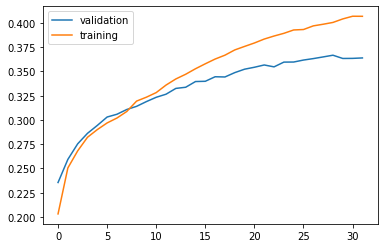

In [ ]:
import matplotlib.pyplot as plt

epochs_ran = len(h.history['loss'])

plt.plot(range(0, epochs_ran), h.history['val_accuracy'], label= 'validation')
plt.plot(range(0, epochs_ran), h.history['accuracy'], label= 'training')

plt.legend()
plt.show()

## Task 7: Generate Names!

In [ ]:
def generate_names(seed):
  for i in range(0,40):
    seq= name_to_seq(seed)
    padded = tf.keras.preprocessing.sequence.pad_sequences(
        [seq], 
        padding='pre', 
        maxlen= max_len-1,
        truncating= 'pre'
    )
    pred = model.predict(padded)[0]
    pred_char= index_to_char[tf.argmax(pred).numpy()]
    seed += pred_char

    if pred_char == '\t':
      break
  
  print(seed)

In [ ]:
generate_names('a')


artian cate	


In [ ]:
generate_names('pe')

penestire shark	


In [ ]:
generate_names('te')

tentain man	


In [ ]:
generate_names('hel')

hellstrange	


In [ ]:
generate_names('h')

harrie strange	


In [ ]:
generate_names('z')

zarather	


In [ ]:
generate_names('x')

xeno bod dester	
